In [0]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics.scorer import make_scorer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold

In [105]:
# Loading credit recods into dataframe cred_df
cred_df = pd.read_csv("train.csv")

# Loading test data into dataframe test
test = pd.read_csv("test.csv")

# Checking data of dataframe tel_df
pd.set_option('display.max_columns', None)
cred_df.head(20)

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
5,6,NaN,36,YES,YES,A46,9055,A65,NaN,A73,2363,47.26,M,Umarried,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
6,7,NaN,24,YES,YES,A40,2835,A63,990.0,A75,1567,47.01,M,Umarried,A101,4,A122,53,A143,A152,1,A173,1,A191,A201
7,8,SILVER,36,YES,YES,A40,6948,A61,98.0,A73,2305,46.10,M,Umarried,A101,2,A123,35,A143,A151,1,A174,1,A192,A201
8,9,NaN,12,YES,YES,A40,3059,A64,2641.0,A74,1891,37.82,M,Divorced,A101,4,A121,61,A143,A152,1,A172,1,A191,A201
9,10,SILVER,30,YES,NO,A40,5234,A61,14.0,A71,964,38.56,M,Married,A101,2,A123,28,A143,A152,2,A174,1,A191,A201


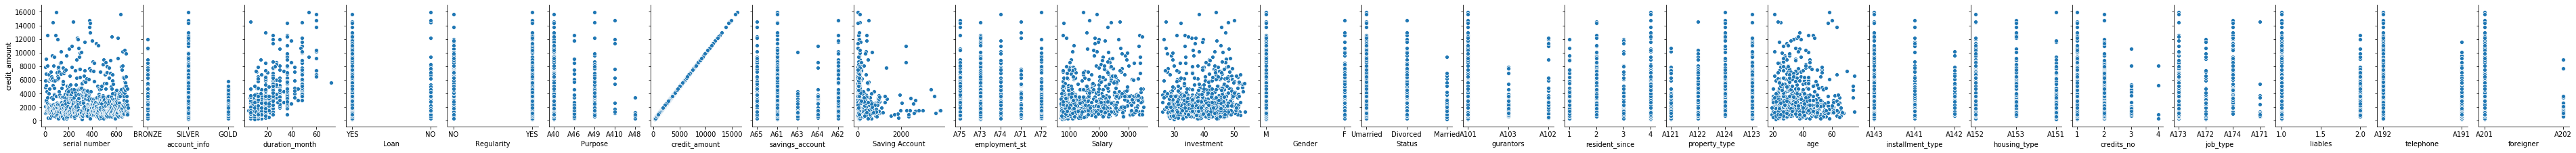

In [106]:
# Visualising scatter plots against target variable
col = cred_df.columns
sns.pairplot(cred_df, x_vars=col, y_vars='credit_amount', size=3, aspect=0.7, kind='scatter')

According the above plots, there are relationships between independent and dependent variables

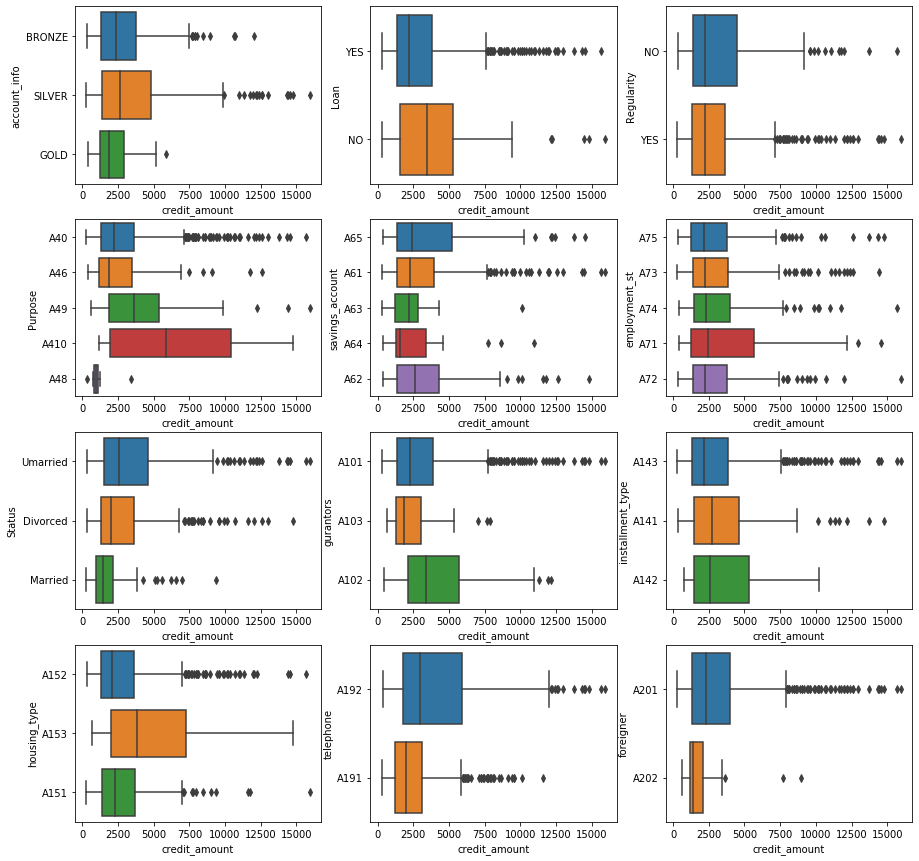

In [107]:
# Visualising box plots against target variable
plt.figure(figsize=(15, 15))
plt.subplot(4, 3, 1)
sns.boxplot(y="account_info", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 2)
sns.boxplot(y="Loan", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 3)
sns.boxplot(y="Regularity", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 4)
sns.boxplot(y="Purpose", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 5)
sns.boxplot(y="savings_account", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 6)
sns.boxplot(y="employment_st", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 7)
sns.boxplot(y="Status", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 8)
sns.boxplot(y="gurantors", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 9)
sns.boxplot(y="installment_type", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 10)
sns.boxplot(y="housing_type", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 11)
sns.boxplot(y="telephone", x="credit_amount", data=cred_df)
plt.subplot(4, 3, 12)
sns.boxplot(y="foreigner", x="credit_amount", data=cred_df)



According to above plots, credit amount changing across different levels of variables.

In [108]:
# Creating function to check variable name, data type, uniquness etc.
from scipy import stats
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

resumetable(cred_df)

Dataset Shape: (700, 25)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,serial number,int64,0,700,1,2,3,9.45
1,account_info,object,273,3,BRONZE,SILVER,NaN,1.39
2,duration_month,int64,0,32,6,48,12,3.70
3,Loan,object,0,2,YES,YES,YES,0.41
4,Regularity,object,0,2,NO,YES,NO,0.96
5,Purpose,object,0,5,A40,A40,A46,0.95
6,credit_amount,int64,0,662,1169,5951,2096,9.34
7,savings_account,object,0,5,A65,A61,A61,1.68
8,Saving Account,float64,120,246,NaN,72,68,7.51
9,employment_st,object,0,5,A75,A73,A74,2.15


In [0]:
# Creating function to reduce the dataframe size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [110]:
# Creating function to check missing values in each column of dataframe
def missing_value(X):
    missing_data = round(100*(X.isnull().sum()/len(X.index)), 2)
    missing_df = pd.DataFrame(missing_data)
    missing_df = missing_df.reset_index()
    missing_df = missing_df.rename(columns={"index":"Columns", 0:"Missing Values(%)"})
    missing_df  = missing_df.sort_values(by="Missing Values(%)", ascending = False)
    return(missing_df[missing_df["Missing Values(%)"] > 0.00])
missing_value(cred_df)

,Columns,Missing Values(%)
1,account_info,39.00
8,Saving Account,17.14


In [111]:
# Seperating dependent variables from dataframe
train_y = cred_df["credit_amount"].copy() 
train_y.head(20)

0      1169
1      5951
2      2096
3      7882
4      4870
5      9055
6      2835
7      6948
8      3059
9      5234
10     1295
11     4308
12     1567
13     1199
14     1403
15     1282
16     2424
17     8072
18    12579
19     3430
Name: credit_amount, dtype: int64

In [112]:
# Seperating independent variables from dataframe
train_X = cred_df.drop(["credit_amount"], axis=1).copy()
train_X.head(20)

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
5,6,NaN,36,YES,YES,A46,A65,NaN,A73,2363,47.26,M,Umarried,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
6,7,NaN,24,YES,YES,A40,A63,990.0,A75,1567,47.01,M,Umarried,A101,4,A122,53,A143,A152,1,A173,1,A191,A201
7,8,SILVER,36,YES,YES,A40,A61,98.0,A73,2305,46.10,M,Umarried,A101,2,A123,35,A143,A151,1,A174,1,A192,A201
8,9,NaN,12,YES,YES,A40,A64,2641.0,A74,1891,37.82,M,Divorced,A101,4,A121,61,A143,A152,1,A172,1,A191,A201
9,10,SILVER,30,YES,NO,A40,A61,14.0,A71,964,38.56,M,Married,A101,2,A123,28,A143,A152,2,A174,1,A191,A201


In [0]:
# Removing Unique value column from dataframe
train_X = train_X.drop(["serial number"], axis=1)

In [114]:
# Checking every categorical variable's values
train_X["foreigner"].value_counts()

A201    674
A202     26
Name: foreigner, dtype: int64

In [115]:
# Checking values of variable savings_account and Saving Account
train_X[train_X["savings_account"] == "A65"][["savings_account", "Saving Account"]]
train_X[train_X["savings_account"] == "A65"][["savings_account", "Saving Account"]]

,savings_account,Saving Account
0,A65,NaN
5,A65,NaN
16,A65,NaN
17,A65,NaN
24,A65,NaN
...,...,...
661,A65,NaN
681,A65,NaN
685,A65,NaN
686,A65,NaN


### Values of categorical variables
- account_info: SILVER, BRONZE, GOLD # ordinal variable
- Loan: YES, NO # binary variable
- Regularity: YES, NO # binary variable
- Purpose: A40, A49, A46, A410, A48 # nominal variable
- savings_account: A61, A65, A62, A63, A64 # ordinal variable
- employment_st: A73, A75, A74, A72, A71 # ordinal variable
- Gender: M, F # binary variable
- Status: Umarried, Divorced, Married # nominal variable
- gurantors: A101, A103, A102 # nominal variable
- property_type: A123, A121, A122, A124 # nominal variable
- installment_type: A143, A141, A142 # nominal variable
- housing_type: A152, A151, A153 # nominal variable
- job_type: A173, A172, A174, A171 # nominal variable
- telephone: A191, A192 # binary variable
- foreigner: A201, A202 # binary variable

### Values of savings_account | Saving Account
- A61 | 1-99
- A62 | 104-494
- A63 | 504-996
- A64 | 1010-3791
- A65 | NAN means 0

In [116]:
# Checking NaN rows of variable account_info
train_X[train_X["account_info"].isnull()]

,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
2,NaN,12,YES,NO,A46,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
5,NaN,36,YES,YES,A46,A65,NaN,A73,2363,47.26,M,Umarried,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
6,NaN,24,YES,YES,A40,A63,990.0,A75,1567,47.01,M,Umarried,A101,4,A122,53,A143,A152,1,A173,1,A191,A201
8,NaN,12,YES,YES,A40,A64,2641.0,A74,1891,37.82,M,Divorced,A101,4,A121,61,A143,A152,1,A172,1,A191,A201
16,NaN,24,YES,NO,A40,A65,NaN,A75,760,30.40,M,Umarried,A101,4,A122,53,A143,A152,2,A173,1,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,NaN,9,YES,YES,A40,A62,477.0,A75,1418,42.54,M,Umarried,A102,4,A123,35,A143,A152,1,A173,1,A192,A201
694,NaN,24,YES,YES,A40,A61,17.0,A74,1037,41.48,M,Umarried,A101,2,A123,28,A143,A152,1,A173,1,A192,A201
695,NaN,6,YES,YES,A40,A63,709.0,A73,2198,43.96,M,Umarried,A101,4,A122,50,A143,A151,1,A173,1,A191,A201
697,NaN,12,YES,NO,A40,A61,86.0,A71,3469,34.69,F,Divorced,A101,2,A122,38,A143,A152,1,A171,1,A191,A201


In [0]:
# Filling NaN values with NO because NaN signifies that account details are not provided
train_X["account_info"] = train_X["account_info"].fillna("NO")

In [118]:
# Encoding the binary variables
train_X['Loan'] = train_X['Loan'].map({'YES': 1, 'NO': 0})
train_X['Regularity'] = train_X['Regularity'].map({'YES': 1, 'NO': 0})
train_X['Gender'] = train_X['Gender'].map({'M': 1, 'F': 0})
train_X['telephone'] = train_X['telephone'].map({'A192': 1, 'A191': 0})
train_X['foreigner'] = train_X['foreigner'].map({'A201': 1, 'A202': 0})

# Encoding the nominal variables
nom = ['Purpose', 'Status', 'gurantors', 'property_type', 'installment_type', 'housing_type', 'job_type']
for x in nom:
    train_X_new = pd.get_dummies(train_X[x],drop_first=True)
    train_X = pd.concat([train_X,train_X_new],axis=1)
    train_X = train_X.drop([x],axis=1)

# Encoding the ordinal variables
mapper = {'NO': 0, 'BRONZE': 1, 'SILVER': 2, 'GOLD': 3}
train_X['account_info'] = train_X['account_info'].apply(lambda x: mapper[x] if x in mapper else x)
mapper = {'A65': 0, 'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4}
train_X['savings_account'] = train_X['savings_account'].apply(lambda x: mapper[x] if x in mapper else x)
mapper = {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}
train_X['employment_st'] = train_X['employment_st'].apply(lambda x: mapper[x] if x in mapper else x)

train_X.head(20)

,account_info,duration_month,Loan,Regularity,savings_account,Saving Account,employment_st,Salary,investment,Gender,resident_since,age,credits_no,liables,telephone,foreigner,A410,A46,A48,A49,Married,Umarried,A102,A103,A122,A123,A124,A142,A143,A152,A153,A172,A173,A174
0,1,6,1,0,0,NaN,4,852,34.08,1,4,67,2,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,2,48,1,1,1,72.0,2,2400,48.00,0,2,22,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,0,12,1,0,1,68.0,3,2078,41.56,1,3,49,1,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
3,1,42,1,1,1,73.0,3,2380,47.60,1,4,45,1,2,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0
4,1,24,1,0,1,52.0,2,1756,52.68,1,4,53,2,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
5,0,36,1,1,0,NaN,2,2363,47.26,1,4,35,1,2,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0
6,0,24,1,1,3,990.0,4,1567,47.01,1,4,53,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0
7,2,36,1,1,1,98.0,2,2305,46.10,1,2,35,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8,0,12,1,1,4,2641.0,3,1891,37.82,1,4,61,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
9,2,30,1,0,1,14.0,0,964,38.56,1,2,28,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1


In [119]:
# Checking summary statistics of dataframe
train_X.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.95, 0.97, 0.99])

,account_info,duration_month,Loan,Regularity,savings_account,Saving Account,employment_st,Salary,investment,Gender,resident_since,age,credits_no,liables,telephone,foreigner,A410,A46,A48,A49,Married,Umarried,A102,A103,A122,A123,A124,A142,A143,A152,A153,A172,A173,A174
count,700.000000,700.000000,700.000000,700.000000,700.000000,580.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,1.025714,20.652857,0.917143,0.620000,1.204286,265.208621,2.365714,1610.258571,39.365286,0.691429,2.808571,35.322857,1.392857,1.148571,0.397143,0.962857,0.014286,0.057143,0.01000,0.097143,0.091429,0.551429,0.042857,0.052857,0.220000,0.340000,0.155714,0.045714,0.814286,0.718571,0.111429,0.195714,0.635714,0.150000
std,0.969888,12.279683,0.275863,0.485734,0.958202,569.396113,1.195112,784.923838,6.784642,0.462234,1.114573,11.319842,0.572328,0.355920,0.489656,0.189247,0.118751,0.232281,0.09957,0.296364,0.288424,0.497704,0.202680,0.223908,0.414543,0.474047,0.362844,0.209014,0.389154,0.450018,0.314887,0.397033,0.481573,0.357327
min,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,700.000000,26.010000,0.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.000000,709.970000,26.698000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,6.000000,0.000000,0.000000,0.000000,7.000000,0.000000,749.800000,28.559500,0.000000,1.000000,22.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,8.000000,1.000000,0.000000,0.000000,14.000000,1.000000,797.900000,29.609000,0.000000,1.000000,23.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000,0.000000,1.000000,34.000000,2.000000,953.500000,33.742500,0.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,1.000000,1.000000,1.000000,70.000000,2.000000,1265.500000,39.570000,1.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,24.000000,1.000000,1.000000,1.000000,137.500000,3.000000,2198.250000,44.765000,1.000000,4.000000,41.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [120]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 34 columns):
account_info       700 non-null int64
duration_month     700 non-null int64
Loan               700 non-null int64
Regularity         700 non-null int64
savings_account    700 non-null int64
Saving Account     580 non-null float64
employment_st      700 non-null int64
Salary             700 non-null int64
investment         700 non-null float64
Gender             700 non-null int64
resident_since     700 non-null int64
age                700 non-null int64
credits_no         700 non-null int64
liables            700 non-null int64
telephone          700 non-null int64
foreigner          700 non-null int64
A410               700 non-null uint8
A46                700 non-null uint8
A48                700 non-null uint8
A49                700 non-null uint8
Married            700 non-null uint8
Umarried           700 non-null uint8
A102               700 non-null uint8
A103             

In [0]:
# Filling NaN values with zero because NaN signifies that Saving Account have no balance
train_X["Saving Account"] = train_X["Saving Account"].fillna(0)

In [122]:
train_X.head(20)

,account_info,duration_month,Loan,Regularity,savings_account,Saving Account,employment_st,Salary,investment,Gender,resident_since,age,credits_no,liables,telephone,foreigner,A410,A46,A48,A49,Married,Umarried,A102,A103,A122,A123,A124,A142,A143,A152,A153,A172,A173,A174
0,1,6,1,0,0,0.0,4,852,34.08,1,4,67,2,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,2,48,1,1,1,72.0,2,2400,48.00,0,2,22,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,0,12,1,0,1,68.0,3,2078,41.56,1,3,49,1,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
3,1,42,1,1,1,73.0,3,2380,47.60,1,4,45,1,2,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0
4,1,24,1,0,1,52.0,2,1756,52.68,1,4,53,2,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
5,0,36,1,1,0,0.0,2,2363,47.26,1,4,35,1,2,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0
6,0,24,1,1,3,990.0,4,1567,47.01,1,4,53,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0
7,2,36,1,1,1,98.0,2,2305,46.10,1,2,35,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8,0,12,1,1,4,2641.0,3,1891,37.82,1,4,61,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
9,2,30,1,0,1,14.0,0,964,38.56,1,2,28,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1


In [123]:
# Deriving new variables by determining the difference between yearly salary and yearly investment
train_X["save_income"] = train_X["Salary"] - (train_X["investment"]*12)

# Deriving new variables by determining the ration of investment from yearly salary
train_X["salary_inv_ratio"] = ((train_X["investment"]*12)/train_X["Salary"])*100 

train_X.head(20) 

,account_info,duration_month,Loan,Regularity,savings_account,Saving Account,employment_st,Salary,investment,Gender,resident_since,age,credits_no,liables,telephone,foreigner,A410,A46,A48,A49,Married,Umarried,A102,A103,A122,A123,A124,A142,A143,A152,A153,A172,A173,A174,save_income,salary_inv_ratio
0,1,6,1,0,0,0.0,4,852,34.08,1,4,67,2,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,443.04,48.0
1,2,48,1,1,1,72.0,2,2400,48.00,0,2,22,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1824.00,24.0
2,0,12,1,0,1,68.0,3,2078,41.56,1,3,49,1,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1579.28,24.0
3,1,42,1,1,1,73.0,3,2380,47.60,1,4,45,1,2,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1808.80,24.0
4,1,24,1,0,1,52.0,2,1756,52.68,1,4,53,2,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1123.84,36.0
5,0,36,1,1,0,0.0,2,2363,47.26,1,4,35,1,2,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1795.88,24.0
6,0,24,1,1,3,990.0,4,1567,47.01,1,4,53,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1002.88,36.0
7,2,36,1,1,1,98.0,2,2305,46.10,1,2,35,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1751.80,24.0
8,0,12,1,1,4,2641.0,3,1891,37.82,1,4,61,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1437.16,24.0
9,2,30,1,0,1,14.0,0,964,38.56,1,2,28,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,501.28,48.0


In [124]:
# Reducing the size of the dataframe
train_X = reduce_mem_usage(train_X)

Mem. usage decreased to  0.03 Mb (74.6% reduction)


In [0]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y, train_size=0.7,test_size=0.3, random_state=100)

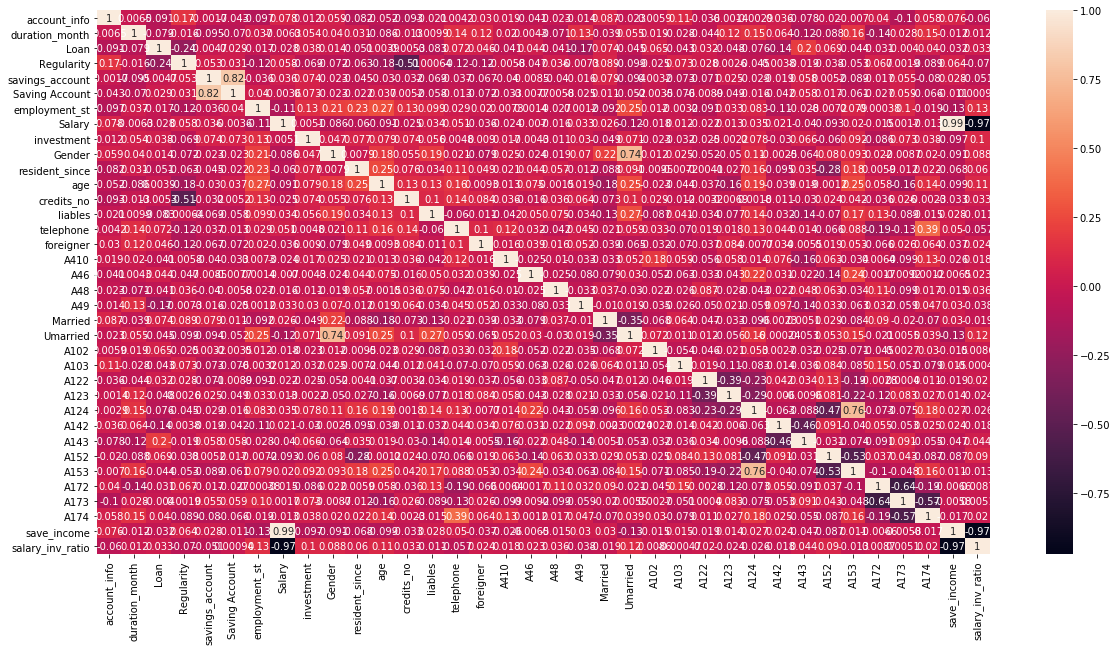

In [126]:
# Checking the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

XGBRegressor: 98.120906 (+/- 0.377161)
Ridge: 98.219785 (+/- 0.369165)
Lasso: 98.215075 (+/- 0.375605)
ExtraTreesRegressor: 98.116855 (+/- 0.396060)


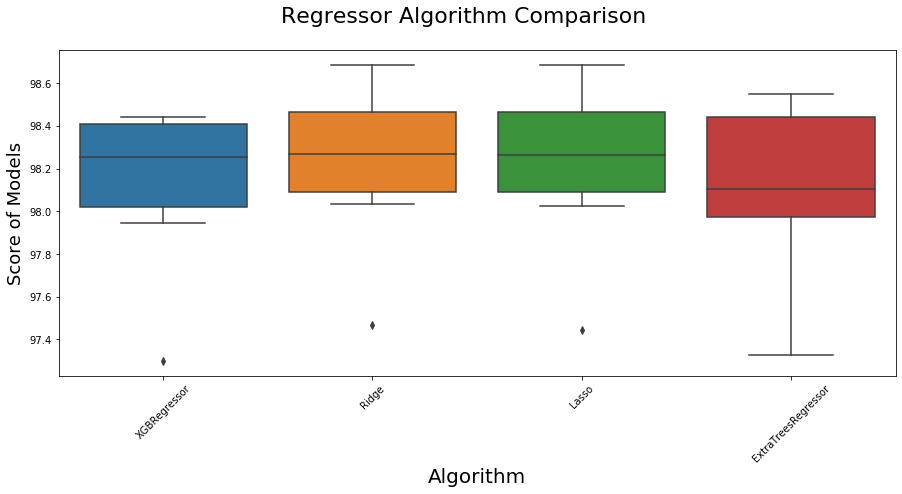

In [127]:
# Creating pipelines to evaluate different models and to choose the best model
clfs = []
seed = 42

clfs.append(("XGBRegressor", Pipeline([("XGBRegressor", XGBRegressor())])))

clfs.append(("Ridge", 
             Pipeline([("Ridge", Ridge())])))

clfs.append(("Lasso", 
             Pipeline([("Lasso", Lasso())])))

clfs.append(("ExtraTreesRegressor",
             Pipeline([("ExtraTreesRegressor", ExtraTreesRegressor())])))

#scoring = 'neg_mean_squared_error'
def nrmse_func(obs, pred):
    squared_sums = sum((obs - pred)**2)
    mse = squared_sums/len(obs)
    rmse = np.sqrt(mse)
    nrmse_per = (1-rmse/100000)*100
    return(nrmse_per)
scoring = make_scorer(nrmse_func, greater_is_better=True)

n_folds = 7

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, shuffle=False, random_state=seed)
    
    cv_results = cross_val_score(model, 
                                 X_train.values, y_train, 
                                 cv= kfold, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  
                               cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Regressor Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithm", fontsize=20) 
ax.set_ylabel("Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

By seeing above plots, we can choose the XGBregresssor and Ridege.
XGBRegresssor is giving good result but it is overfitting which we can handle in hyperparameter tuning.
Ridege is also giving good result but it is less overfitting than XGBRegressor.

________________________________________________________________________________

In [128]:
# Creating new model with Ridge
# Intantiating Ridge
model  = Ridge(random_state=100, normalize=False)

# Intantiating KFold
fold = KFold(n_splits=5,shuffle=True,random_state=100)

# Hyperparameters
hyperparameter = {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.3, 0.4, 25, 29, 30, 31, 32, 35, 39, 40.5, 40, 40.5, 41, 41.5, 42]}

scoring = make_scorer(nrmse_func, greater_is_better=True)

# Instantiating the grid search model
model_cv = GridSearchCV(estimator=model,
                       param_grid=hyperparameter,
                       scoring = scoring,
                       cv=fold,
                       verbose=1,
                       n_jobs=-1,
                       return_train_score=True)

# Fitting
model_cv.fit(X_train,y_train)

# Printing the optimal score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best roc_auc score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


The best roc_auc score is 98.25370057640262 corresponding to hyperparameters {'alpha': 41}


[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.7s finished


In [129]:
# Applying best hyperparameters
final_model = Ridge(normalize=False, alpha= best_hyperparams['alpha'])

# fitting model
final_model.fit(X_train, y_train)

Ridge(alpha=41, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [130]:
# prediction and evaluation on train set
y_train_pred = final_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r_squared = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_rmse_per = (1-train_rmse/100000)*100
print("train MSE:", train_mse, ", train R2:",train_r_squared, ", train RMSE Percentage:", train_rmse_per)

# prediction and evaluation on test set
y_test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r_squared = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_rmse_per = (1-test_rmse/100000)*100
print("test MSE:", test_mse, ", test R2:",test_r_squared, ", test RMSE Percentage:", test_rmse_per)

train MSE: 2749975.4035571963 , train R2: 0.6108606437333508 , train RMSE Percentrage: 98.34169502094542
test MSE: 3654670.9440393937 , test R2: 0.5560628271308516 , test RMSE Percentrage: 98.08828063146304


________________________________________________________________________________

In [0]:
# Creating new model with XGBRegressor
# Intantiating XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.metrics import make_scorer
## Hyperopt modules
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial
import xgboost as xgb
import gc

import time
def objective(params):
    time1 = time.time()
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'subsample': "{:.2f}".format(params['subsample']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'reg_lambda': "{:.3f}".format(params['reg_lambda']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'min_child_weight': '{:.3f}'.format(params['min_child_weight'])
    }

    print("\n############## New Run ################")
    print(f"params = {params}")
    FOLDS = 12
    count=1
    kf = KFold(n_splits=FOLDS, shuffle=False, random_state=42)

    y_preds = np.zeros(X_test.shape[0]) #For the shape of test data, specially rows
    score_mean = 0
    for tr_idx, val_idx in kf.split(X_train, y_train):
        clf = xgb.XGBRegressor(
            n_estimators=500, objective='reg:linear', random_state=4, 
            verbose=True, 
            tree_method='gpu_hist', 
            **params
        )

        X_tr, X_vl = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
        y_tr, y_vl = y_train.iloc[tr_idx], y_train.iloc[val_idx]
        
        clf.fit(X_tr, y_tr)
        score = make_scorer(nrmse_func, greater_is_better=True)(clf, X_vl, y_vl)
        score_mean += score
        print(f'{count} CV - score: {round(score, 4)}')
        count += 1
    time2 = time.time() - time1
    print(f"Total Time Run: {round(time2 / 60,2)}")
    gc.collect()
    print(f'Mean Score: {score_mean / FOLDS}')
    del X_tr, X_vl, y_tr, y_vl, clf, score
    
    return -(score_mean / FOLDS)

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'gamma': hp.uniform('gamma', 0.01, 0.7),
    'subsample': hp.choice('subsample', [.5, 0.6, 0.7, 0.8]),
    'reg_alpha':  hp.uniform('reg_alpha', 0.01, 0.4),
    'reg_lambda': hp.uniform('reg_lambda', 0.01, .4),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.15),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1),
    'min_child_weight': hp.choice('min_child_weight', [7,8,9,10])
}


In [132]:
# HyperOpt Run
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30
           )


############## New Run ################
params = {'max_depth': 3, 'gamma': '0.366', 'subsample': '0.80', 'reg_alpha': '0.174', 'reg_lambda': '0.204', 'learning_rate': '0.143', 'colsample_bytree': '0.687', 'min_child_weight': '10.000'}
[19:13:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 CV - score: 98.2701
[19:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 CV - score: 98.3283
[19:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 CV - score: 98.0294
[19:13:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4 CV - score: 97.1389
[19:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5 CV - score: 98.1326
[19:13:53] WARNING:

In [133]:
# Best parameters
best_params = space_eval(space, best)
best_params['max_depth'] = int(best_params['max_depth'])
best_params

{'colsample_bytree': 0.6197385544643407,
 'gamma': 0.33586388147789437,
 'learning_rate': 0.01049309863189449,
 'max_depth': 4,
 'min_child_weight': 10,
 'reg_alpha': 0.38871844871551,
 'reg_lambda': 0.3851397582512182,
 'subsample': 0.5}

In [134]:
# Predicting with best params Xgb
final_model = xgb.XGBRegressor(
    n_estimators=500,
    **best_params,
    tree_method='gpu_hist'
)
final_model.fit(X_train, y_train)

[19:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6197385544643407,
             gamma=0.33586388147789437, importance_type='gain',
             learning_rate=0.01049309863189449, max_delta_step=0, max_depth=4,
             min_child_weight=10, missing=None, n_estimators=500, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.38871844871551, reg_lambda=0.3851397582512182,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.5,
             tree_method='gpu_hist', verbosity=1)

In [135]:
# prediction and evaluation on train set
y_train_pred = final_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r_squared = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_rmse_per = (1-train_rmse/100000)*100
print("train MSE:", train_mse, ", train R2:",train_r_squared, ", train RMSE Percentrage:", train_rmse_per)

# prediction and evaluation on test set
y_test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r_squared = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_rmse_per = (1-test_rmse/100000)*100
print("test MSE:", test_mse, ", test R2:",test_r_squared, ", test RMSE Percentrage:", test_rmse_per)

train MSE: 1683658.876560827 , train R2: 0.7617513485575134 , train RMSE Percentrage: 98.70244118570261
test MSE: 3662950.349340723 , test R2: 0.5550571180427313 , test RMSE Percentrage: 98.08611642220832


.

#### Result from XGBRegressor:
- train MSE: 1683658.876560827 , train R2: 0.7617513485575134 , train RMSE Percentrage: 98.70244118570261
- test MSE: 3662950.349340723 , test R2: 0.5550571180427313 , test RMSE Percentrage: 98.08611642220832

#### Result from Ridge:
- train MSE: 2749975.4035571963 , train R2: 0.6108606437333508 , train RMSE Percentrage: 98.34169502094542
- test MSE: 3654670.9440393937 , test R2: 0.5560628271308516 , test RMSE Percentrage: 98.08828063146304

Here Ridge is better than XGBRegressor, as Ridge is very less overfitting than XGBRegressor.

After getting results of score on final test data, We are choosing XGBRegressor for the final predictions, just because it is giving good results.

.


## Let's start working on final test data

In [136]:
# Taking entire data to train the model
X_train = train_X.copy()
y_train = train_y.copy()
print(X_train.shape)
print(y_train.shape)

(700, 36)
(700,)


In [0]:
# Creating new model with XGBRegressor
# Intantiating XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.metrics import make_scorer
## Hyperopt modules
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial
import xgboost as xgb
import gc

import time
def objective(params):
    time1 = time.time()
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'subsample': "{:.2f}".format(params['subsample']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'reg_lambda': "{:.3f}".format(params['reg_lambda']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'min_child_weight': '{:.3f}'.format(params['min_child_weight'])
    }

    print("\n############## New Run ################")
    print(f"params = {params}")
    FOLDS = 12
    count=1
    kf = KFold(n_splits=FOLDS, shuffle=False, random_state=42)

    y_preds = np.zeros(test.shape[0]) #For the shape of test data, specially rows
    score_mean = 0
    for tr_idx, val_idx in kf.split(X_train, y_train):
        clf = xgb.XGBRegressor(
            n_estimators=500, objective='reg:linear', random_state=4, 
            verbose=True, 
            tree_method='gpu_hist', 
            **params
        )

        X_tr, X_vl = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
        y_tr, y_vl = y_train.iloc[tr_idx], y_train.iloc[val_idx]
        
        clf.fit(X_tr, y_tr)
        score = make_scorer(nrmse_func, greater_is_better=True)(clf, X_vl, y_vl)
        score_mean += score
        print(f'{count} CV - score: {round(score, 4)}')
        count += 1
    time2 = time.time() - time1
    print(f"Total Time Run: {round(time2 / 60,2)}")
    gc.collect()
    print(f'Mean Score: {score_mean / FOLDS}')
    del X_tr, X_vl, y_tr, y_vl, clf, score
    
    return -(score_mean / FOLDS)

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'gamma': hp.uniform('gamma', 0.01, 0.7),
    'subsample': hp.choice('subsample', [.5, 0.6, 0.7, 0.8]),
    'reg_alpha':  hp.uniform('reg_alpha', 0.01, 0.4),
    'reg_lambda': hp.uniform('reg_lambda', 0.01, .4),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.15),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1),
    'min_child_weight': hp.choice('min_child_weight', [7,8,9,10])
}

In [138]:
# HyperOpt Run
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30
           )


############## New Run ################
params = {'max_depth': 6, 'gamma': '0.124', 'subsample': '0.60', 'reg_alpha': '0.024', 'reg_lambda': '0.246', 'learning_rate': '0.080', 'colsample_bytree': '0.577', 'min_child_weight': '7.000'}
[19:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 CV - score: 98.0243
[19:28:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 CV - score: 97.3578
[19:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 CV - score: 98.3574
[19:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4 CV - score: 98.1769
[19:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5 CV - score: 97.5494
[19:28:51] WARNING: 

In [139]:
# Best parameters
best_params = space_eval(space, best)
best_params['max_depth'] = int(best_params['max_depth'])
best_params

{'colsample_bytree': 0.6944920911276884,
 'gamma': 0.14085773435064303,
 'learning_rate': 0.013507788665107268,
 'max_depth': 2,
 'min_child_weight': 9,
 'reg_alpha': 0.22848802167875173,
 'reg_lambda': 0.06621671527405198,
 'subsample': 0.7}

In [140]:
# Predicting with best params Xgb
final_model = xgb.XGBRegressor(
    n_estimators=500,
    **best_params,
    tree_method='gpu_hist'
)
final_model.fit(X_train, y_train)

[19:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6944920911276884,
             gamma=0.14085773435064303, importance_type='gain',
             learning_rate=0.013507788665107268, max_delta_step=0, max_depth=2,
             min_child_weight=9, missing=None, n_estimators=500, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.22848802167875173, reg_lambda=0.06621671527405198,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.7,
             tree_method='gpu_hist', verbosity=1)

In [141]:
# Checking data of dataframe test
pd.set_option('display.max_columns', None)
test.head(10)

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,F,Divorced,A101,4,A123,29,A143,A151,1,A172,1,A191,A201
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,M,Umarried,A101,4,A124,46,A143,A153,2,A173,1,A192,A201
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,47.24,F,Divorced,A101,2,A124,47,A143,A153,1,A173,1,A192,A201
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,34.12,M,Umarried,A101,2,A122,41,A142,A152,2,A173,1,A191,A201
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,35.52,F,Divorced,A101,1,A122,32,A143,A152,1,A173,2,A192,A201
5,6,NaN,15,YES,YES,A40,A63,836.0,A75,2745,27.45,F,Divorced,A101,4,A124,35,A143,A153,1,A173,1,A191,A201
6,7,SILVER,48,YES,YES,A40,A62,394.0,A74,1551,46.53,M,Umarried,A101,2,A122,24,A143,A152,1,A173,1,A191,A201
7,8,SILVER,12,NO,YES,A40,A61,73.0,A72,1128,45.12,F,Divorced,A101,3,A122,25,A143,A151,2,A173,1,A191,A201
8,9,SILVER,9,YES,YES,A40,A61,21.0,A75,876,35.04,F,Divorced,A101,4,A121,25,A143,A152,1,A173,1,A191,A201
9,10,SILVER,9,YES,YES,A40,A61,61.0,A73,2181,43.62,M,Umarried,A101,2,A121,37,A143,A152,1,A172,2,A191,A201


In [142]:
# Checking shape of dataframe test
test.shape

(300, 24)

In [143]:
# Checking information of columns of dataframe test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
serial number       300 non-null int64
account_info        179 non-null object
duration_month      300 non-null int64
Loan                300 non-null object
Regularity          300 non-null object
Purpose             300 non-null object
savings_account     300 non-null object
Saving Account      237 non-null float64
employment_st       300 non-null object
Salary              300 non-null int64
investment          300 non-null float64
Gender              300 non-null object
Status              300 non-null object
gurantors           300 non-null object
resident_since      300 non-null int64
property_type       300 non-null object
age                 300 non-null int64
installment_type    300 non-null object
housing_type        300 non-null object
credits_no          300 non-null int64
job_type            300 non-null object
liables             300 non-null int64
telephone           

In [144]:
# seperating serial column from dataframe
serial = test.iloc[:,:1].copy() 
test = test.iloc[:,1:]

serial.head()

,serial number
0,1
1,2
2,3
3,4
4,5


In [145]:
test.head()

,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,F,Divorced,A101,4,A123,29,A143,A151,1,A172,1,A191,A201
1,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,M,Umarried,A101,4,A124,46,A143,A153,2,A173,1,A192,A201
2,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,47.24,F,Divorced,A101,2,A124,47,A143,A153,1,A173,1,A192,A201
3,SILVER,30,YES,NO,A49,A62,326.0,A75,853,34.12,M,Umarried,A101,2,A122,41,A142,A152,2,A173,1,A191,A201
4,SILVER,27,YES,YES,A49,A61,16.0,A72,888,35.52,F,Divorced,A101,1,A122,32,A143,A152,1,A173,2,A192,A201


In [146]:
# Checking the missing values of test dataframe
missing_value(test)

,Columns,Missing Values(%)
0,account_info,40.33
6,Saving Account,21.00


In [147]:
# Filling NaN values with NO because NaN signifies that account details are not provided
test["account_info"] = test["account_info"].fillna("NO")

# Encoding the binary variables 
test['Loan'] = test['Loan'].map({'YES': 1, 'NO': 0})
test['Regularity'] = test['Regularity'].map({'YES': 1, 'NO': 0})
test['Gender'] = test['Gender'].map({'M': 1, 'F': 0})
test['telephone'] = test['telephone'].map({'A192': 1, 'A191': 0})
test['foreigner'] = test['foreigner'].map({'A201': 1, 'A202': 0})

# Encoding the nominal variables
nom = ['Purpose', 'Status', 'gurantors', 'property_type', 'installment_type', 'housing_type', 'job_type']
for x in nom:
    test_new = pd.get_dummies(test[x],drop_first=True)
    test = pd.concat([test,test_new],axis=1)
    test = test.drop([x],axis=1)

# Encoding the ordinal variables
mapper = {'NO': 0, 'BRONZE': 1, 'SILVER': 2, 'GOLD': 3}
test['account_info'] = test['account_info'].apply(lambda x: mapper[x] if x in mapper else x)
mapper = {'A65': 0, 'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4}
test['savings_account'] = test['savings_account'].apply(lambda x: mapper[x] if x in mapper else x)
mapper = {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75': 4}
test['employment_st'] = test['employment_st'].apply(lambda x: mapper[x] if x in mapper else x)

# Filling missing values of vairable Saving Account with median
test["Saving Account"] = test["Saving Account"].fillna(0)

# Deriving new variables by determining the difference between yearly salary and yearly investment
test["save_income"] = test["Salary"] - (test["investment"]*12)
# Deriving new variables by determining the ration of investment from yearly salary
test["salary_inv_ratio"] = ((test["investment"]*12)/test["Salary"])*100 

test.head(20) 

,account_info,duration_month,Loan,Regularity,savings_account,Saving Account,employment_st,Salary,investment,Gender,resident_since,age,credits_no,liables,telephone,foreigner,A410,A46,A48,A49,Married,Umarried,A102,A103,A122,A123,A124,A142,A143,A152,A153,A172,A173,A174,save_income,salary_inv_ratio
0,0,12,1,1,3,517.0,2,1134,45.36,0,4,29,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,589.68,48.0
1,1,48,1,0,1,18.0,4,783,31.32,1,4,46,2,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,407.16,48.0
2,3,24,1,1,2,389.0,4,1181,47.24,0,2,47,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,614.12,48.0
3,2,30,1,0,2,326.0,4,853,34.12,1,2,41,2,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,443.56,48.0
4,2,27,1,1,1,16.0,1,888,35.52,0,1,32,1,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,461.76,48.0
5,0,15,1,1,3,836.0,4,2745,27.45,0,4,35,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,2415.60,12.0
6,2,48,1,1,2,394.0,3,1551,46.53,1,2,24,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,992.64,36.0
7,2,12,0,1,1,73.0,1,1128,45.12,0,3,25,2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,586.56,48.0
8,2,9,1,1,1,21.0,4,876,35.04,0,4,25,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,455.52,48.0
9,2,9,1,1,1,61.0,2,2181,43.62,1,2,37,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1657.56,24.0


In [148]:
# Calling function to reduce the dataframe size
test = reduce_mem_usage(test)

Mem. usage decreased to  0.01 Mb (74.5% reduction)


In [149]:
# prediction and evaluation on train set
y_train_pred = final_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r_squared = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_rmse_per = (1-train_rmse/100000)*100
print("train MSE:", train_mse, ", train R2:",train_r_squared, ", train RMSE Percentrage:", train_rmse_per)

train MSE: 2426708.2478792192 , train R2: 0.6728072490298256 , train RMSE Percentrage: 98.44221046098029


In [0]:
# Prediction on new test data
new_y_test_preds = final_model.predict(test)

In [151]:
# Checking shape of predictions
new_y_test_preds.shape

(300,)

In [152]:
# Generating submission data
new_y_test_preds_final = pd.DataFrame(data=new_y_test_preds, columns=["credit_amount"])
new_y_test_preds_final["S.no"] = serial["serial number"]
new_y_test_preds_final = new_y_test_preds_final[["S.no", "credit_amount"]]
new_y_test_preds_final.head()

,S.no,credit_amount
0,1,973.875000
1,2,6381.589844
2,3,3231.810059
3,4,3258.298340
4,5,3860.336914


In [153]:
new_y_test_preds_final.shape

(300, 2)

In [0]:
new_y_test_preds_final.to_csv ("predictions.csv", sep=",", index = None, header=True)